In [1]:
import pandas as pd

DATASETS_PATH = 'data/datasets'

df = pd.read_csv(f'{DATASETS_PATH}/A2AR_LIGANDS.tsv', sep='\t', header=0, na_values=('NA', 'nan', 'NaN'))
df

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AACWUFIIMOHGSO_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.91968,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,AACWUFIIMOHGSO,AACWUFIIMOHGSO-UHFFFAOYSA-N,InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...,"""AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...",P29274_WT,...,NaN,NaN,=,8.68;8.68;8.68;8.68,8.6800,0.000000,0.000000,4.0,8.6800,0.0000
1,AAEYTMMNWWKSKZ_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131451,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,AAEYTMMNWWKSKZ,AAEYTMMNWWKSKZ-UHFFFAOYSA-N,InChI=1S/C18H16N4O3S/c19-15-13-9-10-3-1-2-4-14...,"""AuxInfo=1/1/N:22,23,21,24,8,15,9,14,19,20,7,1...",P29274_WT,...,NaN,NaN,=,4.82;4.82,4.8200,0.000000,0.000000,2.0,4.8200,0.0000
2,AAGFKZWKWAMJNP_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.100375,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,AAGFKZWKWAMJNP,AAGFKZWKWAMJNP-UHFFFAOYSA-N,InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...,"""AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...",P29274_WT,...,NaN,NaN,=,5.65;5.65,5.6500,0.000000,0.000000,2.0,5.6500,0.0000
3,AAJLGNFYNMJGSY_on_P29274_WT,High,ExCAPE-DB,9586623,NC(=NC(=O)Cn1c(O)c2CCCCc2c1O)Nc1nc2c(cccc2)s1,AAJLGNFYNMJGSY,AAJLGNFYNMJGSY-UHFFFAOYSA-N,InChI=1S/C18H19N5O3S/c19-17(22-18-20-12-7-3-4-...,"""AuxInfo=1/1/N:12,13,25,24,11,14,26,23,6,10,15...",P29274_WT,...,NaN,NaN,=,5.3;5.3,5.3000,0.000000,0.000000,2.0,5.3000,0.0000
4,AANUKDYJZPKTKN_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.123484;45483959;ChEMBL31.com...,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,AANUKDYJZPKTKN,AANUKDYJZPKTKN-UHFFFAOYSA-N,InChI=1S/C28H31ClN6O5/c1-30-27(39)28-13-18(28)...,"""AuxInfo=1/1/N:1,25,18,19,17,20,35,36,34,16,21...",P29274_WT,...,NaN,NaN,=,5.45;5.451;5.45;5.451;5.45;5.451;5.45;5.451,5.4505,0.000535,0.000189,8.0,5.4505,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,ZYXGKENMDDPQIE_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.399078,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,ZYXGKENMDDPQIE,ZYXGKENMDDPQIE-UHFFFAOYSA-N,InChI=1S/C19H18N6O3/c1-20-19-22-11-14(17-23-16...,"""AuxInfo=1/1/N:1,16,24,23,12,18,13,17,25,10,5,...",P29274_WT,...,NaN,NaN,=,7.09;7.09,7.0900,0.000000,0.000000,2.0,7.0900,0.0000
4292,ZYZWFDVXMLCIOU_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.94689;10132473;ChEMBL31.comp...,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,ZYZWFDVXMLCIOU,ZYZWFDVXMLCIOU-UHFFFAOYSA-N,InChI=1S/C18H16N6O2/c19-17-22-14(13-7-4-10-26-...,"""AuxInfo=1/1/N:22,21,23,7,20,24,6,18,17,8,12,1...",P29274_WT,...,NaN,NaN,=,8.22;8.222;8.22;8.222;8.22;8.222;8.22;8.222,8.2210,0.001069,0.000378,8.0,8.2210,0.0010
4293,ZZBZWSYDXUPJCT_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131461,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,ZZBZWSYDXUPJCT,ZZBZWSYDXUPJCT-UHFFFAOYSA-N,InChI=1S/C12H11FN8S2/c13-6-1-3-7(4-2-6)16-11-1...,"""AuxInfo=1/1/N:8,11,7,12,15,9,6,14,2,20,4,17,1...",P29274_WT,...,NaN,NaN,=,4.89;4.89,4.8900,0.000000,0.000000,2.0,4.8900,0.0000
4294,ZZMIPZLRKFEGIA_on_P29274_WT,High,ExCAPE-DB,71563052;ChEMBL31.compound.202018;71563052;ChE...,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,ZZMIPZLRKFEGIA,ZZMIPZLRKFEGIA-UHFFFAOYSA-N,InChI=1S/C20H23N3O3/c1-5-12-26-16-10-7-14(8-11...,"""AuxInfo=1/0/N:1,24,22,18,2,9,7,25,10,6,26,3,1...",P29274_WT,...,NaN,NaN,=,6.513;6.51;6.513;6.51;6.513;6.51;6.513;6.51,6.5115,0.001604,0.000567,8.0,6.5115,0.0015


In [2]:
import os
from qsprpred.data.data import QSPRDataset
from qsprpred.data.utils.descriptorsets import MorganFP
from qsprpred.data.utils.descriptorcalculator import DescriptorsCalculator
from qsprpred.data.utils.datasplitters import scaffoldsplit
from qsprpred.data.utils.featurefilters import lowVarianceFilter, highCorrelationFilter

DATA_PATH_QSAR = "data/datasets/qsar"
os.makedirs(DATA_PATH_QSAR, exist_ok=True)

# create the data set
dataset = QSPRDataset(
    name="A2AR",
    df=df, 
    target_prop="pchembl_value_Median", 
    store_dir=DATA_PATH_QSAR,
)
dataset.makeClassification(th=[6.5])

# Calculate MorganFP and physicochemical properties
feature_calculator = DescriptorsCalculator(descsets = [MorganFP(3, 2048)])

# split on scaffolds
split = scaffoldsplit(0.2)

dataset.prepareDataset(
    split=split,
    feature_calculator=feature_calculator
)

print(f"Number of samples train set: {len(dataset.y)}")
print(f"Number of samples test set: {len(dataset.y_ind)}, {len(dataset.y_ind) / len(dataset.df) * 100}%")

Parallel apply in progress for A2AR.:   0%|          | 0/8 [00:00<?, ?it/s]

Missing values filled with 0


Number of samples train set: 3425
Number of samples test set: 871, 20.274674115456236%


In [3]:
from qsprpred.models.models import QSPRsklearn
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators' : [50, 250],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    "n_jobs": [1]
}

model = QSPRsklearn(
    base_dir='data/models/qsar/',
    data=dataset, 
    alg = RandomForestClassifier(), 
    alg_name="RandomForestClassifier",
    n_jobs=12
)

model.gridSearch(search_space_gs=params)
model.evaluate()
model.fit()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


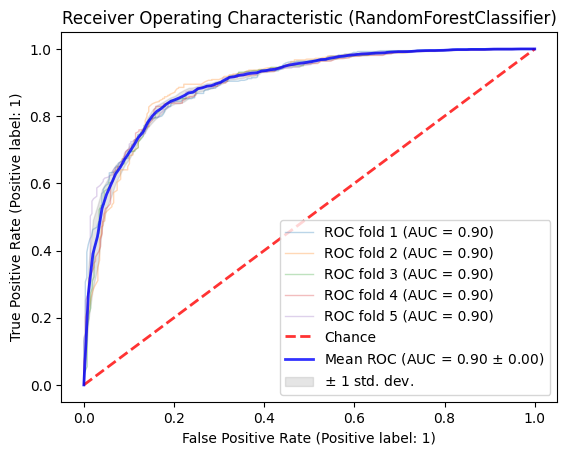

[<AxesSubplot: title={'center': 'Receiver Operating Characteristic (RandomForestClassifier)'}, xlabel='False Positive Rate (Positive label: 1)', ylabel='True Positive Rate (Positive label: 1)'>]

<Figure size 640x480 with 0 Axes>

In [6]:
from qsprpred.plotting.classification import ROCPlot

plot = ROCPlot([model])
plot.make('cv', save = True, show=True)

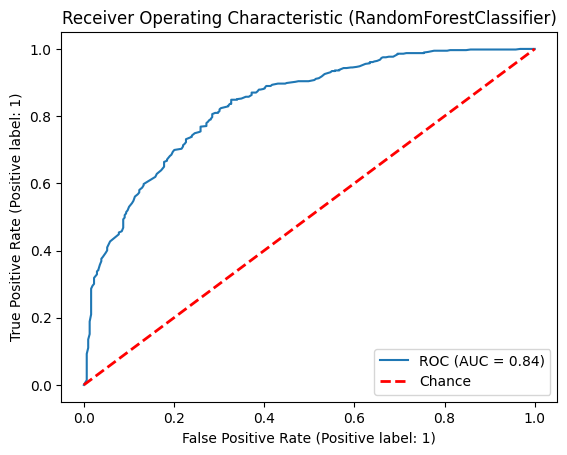

[<AxesSubplot: title={'center': 'Receiver Operating Characteristic (RandomForestClassifier)'}, xlabel='False Positive Rate (Positive label: 1)', ylabel='True Positive Rate (Positive label: 1)'>]

<Figure size 640x480 with 0 Axes>

In [7]:
plot = ROCPlot([model])
plot.make('ind', save = True, show=True)